# Análisis de data procesada:

La data se obtuvo mediante el Apify en su versión gratuita. Se scrapearon tweets mencionando a 'Boric' desde el 01-03-2025 hasta el 06-03-2025.

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

In [4]:
df = pd.read_csv('../data/sentiment_data.csv')
df.head(5)

,type,id,url,twitterUrl,text,source,retweetCount,replyCount,likeCount,quoteCount,...,place,entities,reply_to_user_results,quoted_tweet_results,quoted_tweet,retweeted_tweet,isConversationControlled,searchTermIndex,isQuote,sentiment
0,tweet,1766614905690493310,https://x.com/CanipasJavier/status/17666149056...,https://twitter.com/CanipasJavier/status/17666...,censo cuestión pedazo analfabeto ignorante chu...,NaN,0,0,0,0,...,{},{'user_mentions': [{'id_str': '163941065219530...,"{'rest_id': '1520040469249548288', 'result': {...",NaN,NaN,NaN,False,0,NaN,Negative
1,tweet,1766614753110094019,https://x.com/labrin_leo/status/17666147531100...,https://twitter.com/labrin_leo/status/17666147...,boric papel rey luis xv francia si verdad demente,NaN,0,0,0,0,...,{},{},NaN,{'rest_id': '1766492880040837572'},NaN,NaN,False,0,NaN,Neutral
2,tweet,1766614535090168041,https://x.com/Patodldesierto/status/1766614535...,https://twitter.com/Patodldesierto/status/1766...,simple candidato todavía callampa boric imagín...,NaN,0,0,0,0,...,{'bounding_box_polygon': {'coordinates': [[[-7...,{},NaN,"{'rest_id': '1766445460909183022', 'result': {...","{'type': 'tweet', 'id': '1766445460909183022',...",NaN,False,0,True,Negative
3,tweet,1766614347264979259,https://x.com/DiegoRo97558193/status/176661434...,https://twitter.com/DiegoRo97558193/status/176...,arbolitos miedo censo boric tan tan malo vez e...,NaN,0,1,4,0,...,{},{},NaN,NaN,NaN,NaN,False,0,NaN,Negative
4,tweet,1766614223373717741,https://x.com/imagenesymas01/status/1766614223...,https://twitter.com/imagenesymas01/status/1766...,seguidores puto derecho opinar zurdo mierda an...,NaN,0,0,0,0,...,{},{'user_mentions': [{'id_str': '152444731265902...,"{'rest_id': '1524447312659025925', 'result': {...",NaN,NaN,NaN,False,0,NaN,Negative


## Análisis del dataset:

Primero vemos la **distribución de la longitud** de los tweets.

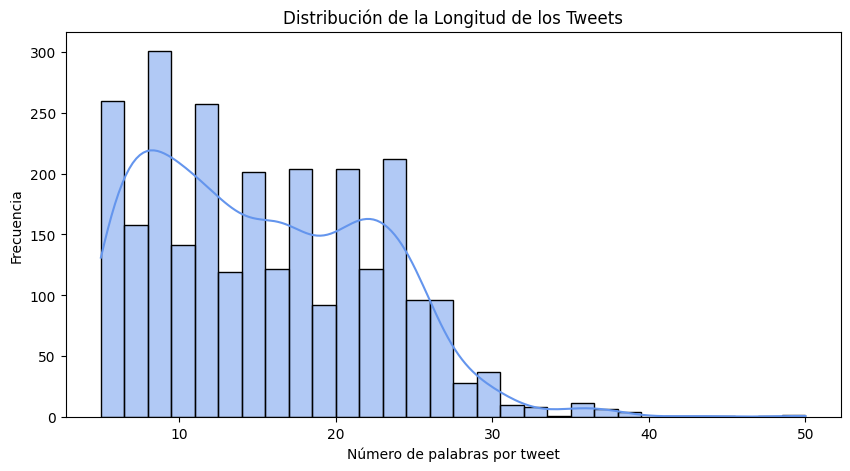

In [17]:
df["tweet_length"] = df["text"].astype(str).apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 5))
sns.histplot(df["tweet_length"], bins=30, kde=True, color="cornflowerblue")
plt.xlabel("Número de palabras por tweet")
plt.ylabel("Frecuencia")
plt.title("Distribución de la Longitud de los Tweets")
plt.show()

Número de tweets por día y hora.

/home/pollodk/.pyenv/versions/3.10.6/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


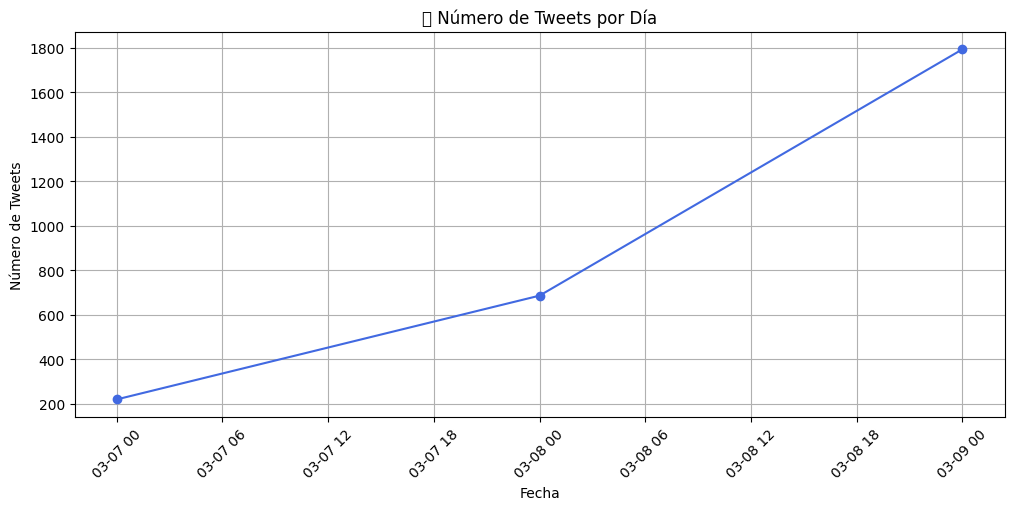

In [19]:
df["createdAt"] = pd.to_datetime(df["createdAt"])
tweets_per_day = df["createdAt"].dt.date.value_counts().sort_index()
plt.figure(figsize=(12, 5))
tweets_per_day.plot(kind="line", marker="o", color="royalblue")
plt.xlabel("Fecha")
plt.ylabel("Número de Tweets")
plt.title("Número de Tweets por Día")
plt.xticks(rotation=45)
plt.grid()
plt.show()

## Word Cloud:

Armamos un word cloud con la base de datos para ver que términos son los que más se repiten

In [6]:
text = " ".join(df["text"].dropna())
text[:500]

'censo cuestión pedazo analfabeto ignorante chucha quieres ser gobierno después boric si cuentas datos oficiales actualizados llevar adelante políticas weones fachos culiaos boric papel rey luis xv francia si verdad demente simple candidato todavía callampa boric imagínate pechoño peor principios siglo xx mojón perro mejor alternativa hijo nazis arbolitos miedo censo boric tan tan malo vez extrañemos piñera gestion seguidores puto derecho opinar zurdo mierda anda chuparle boric déjate quejarte em'

/home/pollodk/.pyenv/versions/3.10.6/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


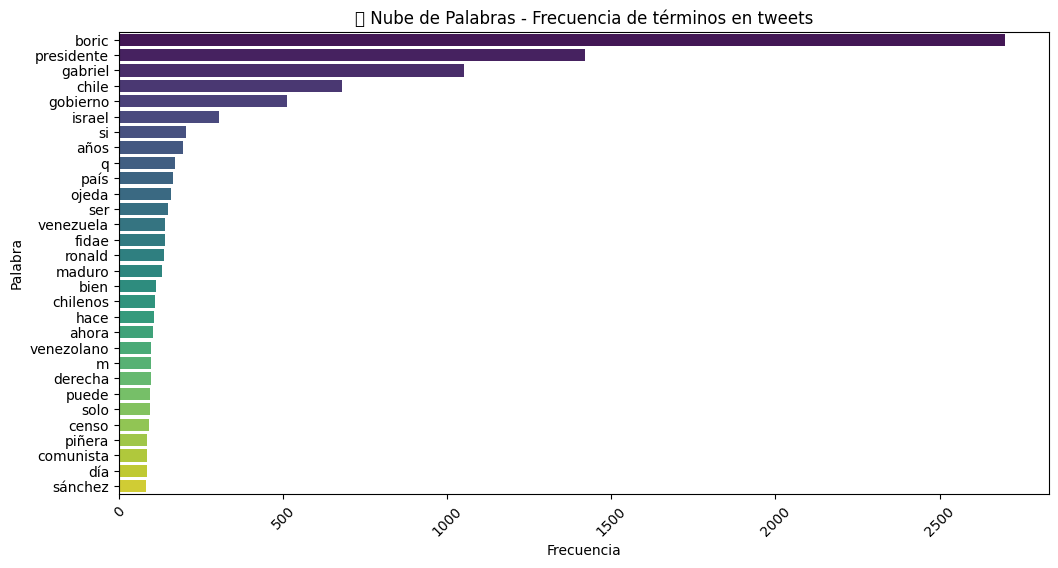

In [14]:
word_counts = Counter(text.split())
most_common_words = word_counts.most_common(30)
words, counts = zip(*most_common_words)
plt.figure(figsize=(12, 6))
sns.barplot(x=list(counts), y=list(words), palette="viridis")
plt.xlabel("Frecuencia")
plt.ylabel("Palabra")
plt.title("🌍 Nube de Palabras - Frecuencia de términos en tweets")
plt.xticks(rotation=45)
plt.show()